In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

import os
from PIL import Image

from matplotlib import gridspec

# Set adquisition

In [2]:
def getImgFromDirectory(directory, image_size, convert): #"RGB" "L"
    img_matrix = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image = Image.open(os.path.join(directory, filename)).resize(image_size)
            image_array = np.array(image.convert(convert))
            img_matrix.append(image_array)

    return np.stack(img_matrix, axis=0)

In [3]:
vectors = getImgFromDirectory(directory="images", image_size=(100, 100), convert="RGB")
vectors.shape

(8755, 100, 100, 3)

# Feature extraction

In [4]:
model = ResNet50(weights= 'imagenet', include_top= False)
model

In [5]:
sample_preprocess = preprocess_input(vectors)

features = model.predict(sample_preprocess)
features.shape

274/274 [==============================] - 159s 555ms/step


(8755, 4, 4, 2048)

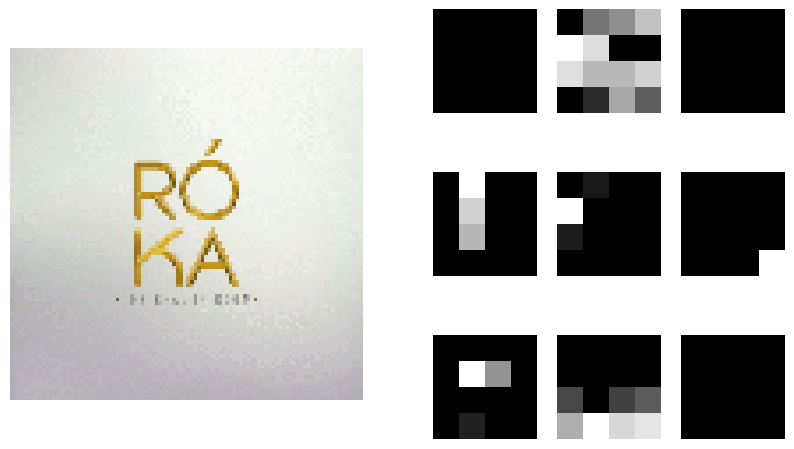

In [6]:
orig = vectors[0]
n_features = features.shape[-1]

fig = plt.figure(figsize = (10, 6))
gs = gridspec.GridSpec(1, 2, figure = fig)
sub_gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1])

ax1 = fig.add_subplot(gs[0])
ax1.axis('off')
ax1.imshow(orig)

for i in range(3):
    for j in range(3):
        ax2 = fig.add_subplot(sub_gs[i, j])
        plt.axis('off')        
        plt.imshow(features[0, :, :, np.random.randint(n_features)], cmap = 'gray')  

In [7]:
sample_preprocess = preprocess_input(vectors)

features = model.predict(sample_preprocess)
features.shape

274/274 [==============================] - 162s 585ms/step


(8755, 4, 4, 2048)

# Euclidean Distance

In [8]:
def getEuclideanDistance(img_matrix):
    eu_matrix = np.zeros((len(img_matrix), len(img_matrix)))

    for vectorX in range(len(img_matrix)):
        for vectorY in range(vectorX):
            eu_matrix[vectorX, vectorY] = np.linalg.norm(img_matrix[vectorX] - img_matrix[vectorY])

    return eu_matrix

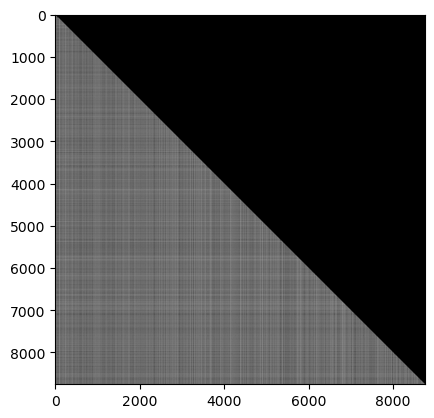

In [9]:
eu_matrix_feature = getEuclideanDistance(features)

plt.imshow(eu_matrix_feature, cmap='gray')

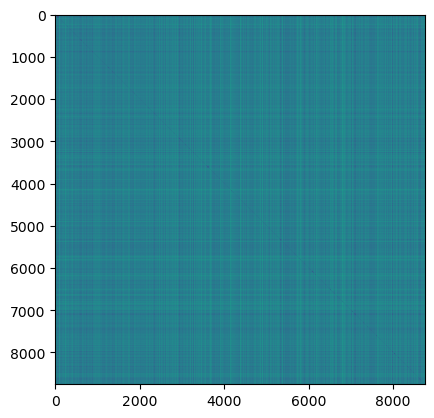

In [85]:
complete_eu = eu_matrix_feature + eu_matrix_feature.T
plt.imshow(complete_eu)

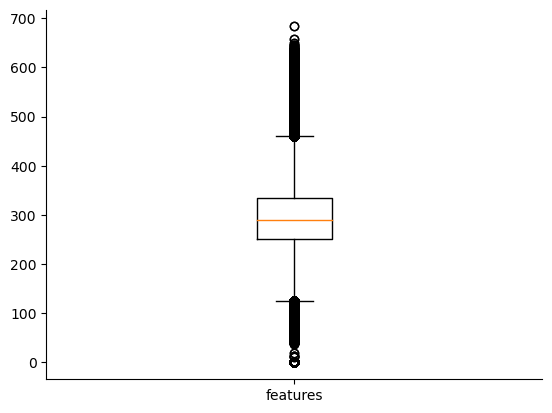

In [86]:
eu_flatten = complete_eu.flatten()

fig, ax = plt.subplots()

ax.boxplot(eu_flatten[eu_flatten != 0])
ax.set_xticklabels(['features'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

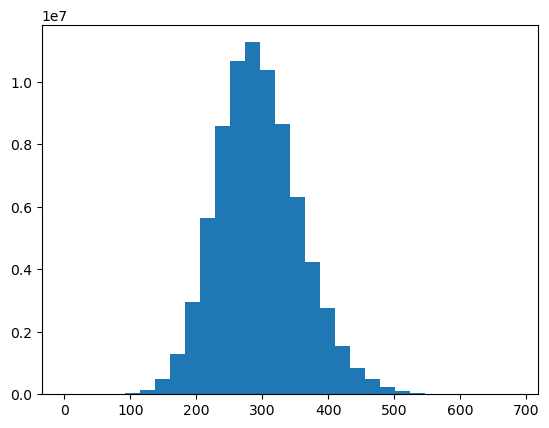

In [87]:
plt.hist(eu_flatten[eu_flatten != 0], bins=30);

In [10]:
## final
def getTuples(matrix, num_tuples,  num_result, condition= 'smaller'):
  result = np.ones(num_result) * (float('inf') if condition == 'smaller' else float(-1))
  final_result = np.array([[0, 0] for _ in range(num_result)])
  
  indexes = np.random.randint(0, len(matrix), size=(num_tuples, 2))
  # print(indexes)
  # for x1, y1 in indexes:
  #   print(matrix[x1][y1])

  for i, (x, y) in enumerate(indexes):
    value = matrix[x, y]

    biggest_value = np.max(result) if condition == 'smaller' else np.min(result)
    biggest_index = np.where(result == biggest_value)[0][0]

    if value != 0 and not np.any(np.isin(result, value)):
      # print('not 0 either is in result array')
      if condition == 'smaller':
        if value < biggest_value:
          result[biggest_index] = value
          final_result[biggest_index] = (x, y)
      elif condition == 'greater':
        if value > biggest_value:
          result[biggest_index] = value
          final_result[biggest_index] = (x, y)
      else:
        return

  return final_result, result

In [11]:
max_tuples, max_values = getTuples(matrix= eu_matrix_feature, 
                                   num_tuples= 8000, 
                                   num_result= 400, 
                                   condition= 'greater')

min_tuples, min_values = getTuples(matrix= eu_matrix_feature,
                                   num_tuples= 8000,
                                   num_result= 400, 
                                   condition= 'smaller')

print('len of max_tuples:', len(max_tuples))
print('len of min_tuples:', len(min_tuples))

len of max_tuples: 400
len of min_tuples: 400


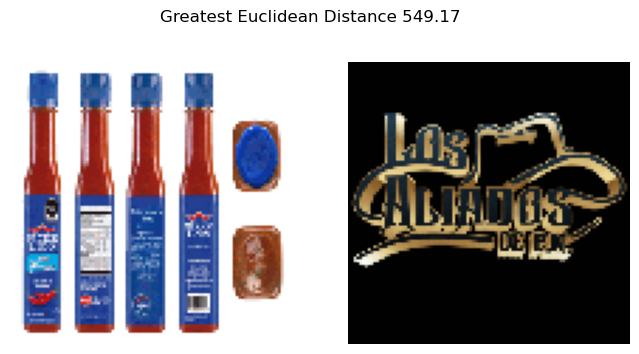

In [12]:
greatest_distance = max_tuples[np.where(max_values == np.max(max_values))[0][0]]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(vectors[greatest_distance[0]], cmap='Reds')
axs[0].axis('off')

axs[1].imshow(vectors[greatest_distance[1]], cmap='Reds')
axs[1].axis('off')

fig.suptitle('Greatest Euclidean Distance {0:.2f}'.format(eu_matrix_feature[greatest_distance[0]][greatest_distance[1]]))

plt.show()

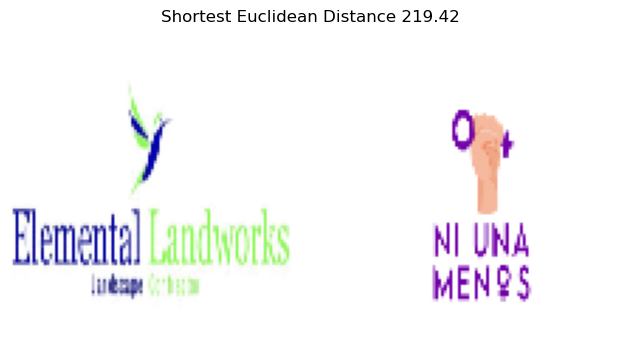

In [13]:
shortest_distance = min_tuples[np.where(min_values == np.max(min_values))[0][0]]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(vectors[shortest_distance[0]], cmap='Reds')
axs[0].axis('off')

axs[1].imshow(vectors[shortest_distance[1]], cmap='Reds')
axs[1].axis('off')

fig.suptitle('Shortest Euclidean Distance {0:.2f}'.format(eu_matrix_feature[shortest_distance[0]][shortest_distance[1]]))

plt.show()

In [25]:
def plot9Closer(original_img, vectors, indexes):
    fig = plt.figure(figsize = (10, 6))
    gs = gridspec.GridSpec(1, 2, figure = fig)
    sub_gs = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1])

    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(original_img)
    ax1.set_aspect('equal')
    ax1.axis('off')

    count = 0
    for i in range(3):
        for j in range(3):
            ax2 = fig.add_subplot(sub_gs[i, j])
            plt.axis('off')        
            plt.imshow(vectors[indexes[count]])
            count += 1

In [16]:
index_original = 13
original_img = vectors[index_original]

row = np.array(eu_matrix_feature[:, index_original])
top_9 = np.sort(row[np.nonzero(row)])[:9]
top_9

array([132.1855011 , 133.67944336, 134.82872009, 135.04318237,
       136.55839539, 136.76223755, 137.00048828, 138.01533508,
       138.08520508])

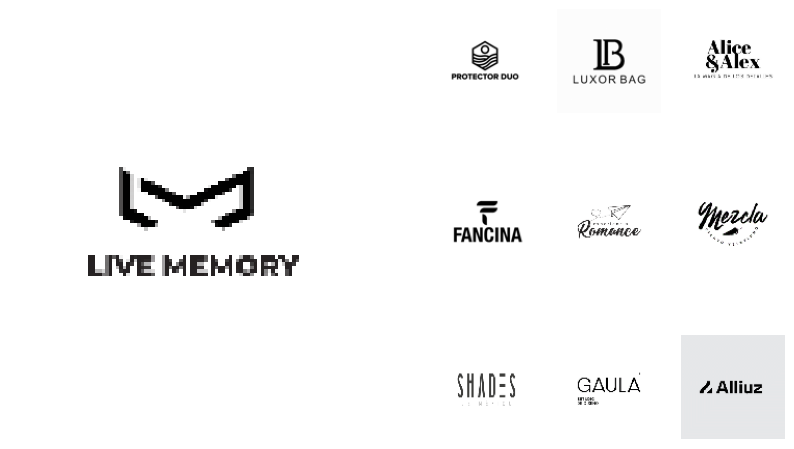

In [26]:
indexes = np.zeros([len(top_9)], dtype= int)

for i in range(len(top_9)):
  tempx = np.where(row == top_9[i])
  indexes[i] = tempx[0][0]

indexes

plot9Closer(original_img, vectors, indexes)

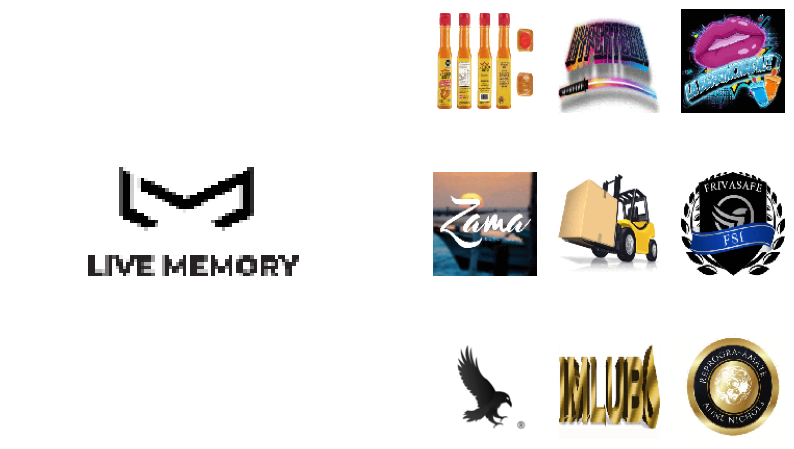

In [31]:
index_original = 13
original_img = vectors[index_original]

row = np.array(eu_matrix_feature[:, index_original])
last_9 = np.sort(row[np.nonzero(row)])[-9:]
last_9

indexes = np.zeros([len(top_9)], dtype= int)

for i in range(len(last_9)):
  tempx = np.where(row == last_9[i])
  indexes[i] = tempx[0][0]

indexes

plot9Closer(original_img, vectors, indexes)

In [55]:
rand_i = 0
random_numbers = np.random.randint(0, len(eu_matrix_feature) + 1, size= 10)
random_numbers

array([1417, 5071, 7947, 8033, 5299,  565, 5651, 1361, 5052, 1415])

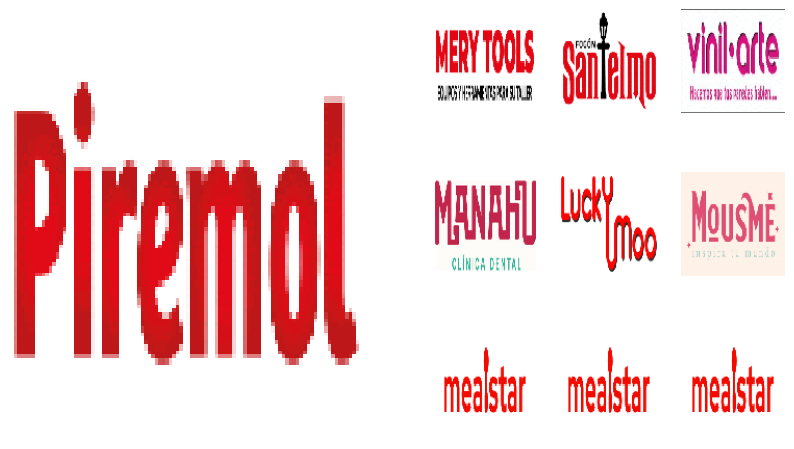

In [60]:
index_original = random_numbers[i]
original_img = vectors[index_original]

row = np.array(eu_matrix_feature[:, index_original])
top_9 = np.sort(row[np.nonzero(row)])[:9]

indexes = np.zeros([len(top_9)], dtype= int)

for i in range(len(top_9)):
  tempx = np.where(row == top_9[i])
  indexes[i] = tempx[0][0]

rand_i += 1
plot9Closer(original_img, vectors, indexes)

In [42]:
top_9

array([214.81207275, 214.81207275, 220.35134888, 220.89242554,
       222.46478271, 222.63206482, 224.15133667, 225.76791382,
       225.76791382])